indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in param

Frequency 337066831576.0
Beam area 1.2951819557802772e-12
Pixel area 9.401756332972848e-15
bmaj 7.500263551871e-05
bmin 5.003065698677e-05
Pixels per beam area 137.75957490388808
Jy per Beam to Jy per pixel 0.007259023561140333
51.4012375 30.754028333333334
Average Beam:  0.225059926509864 11.2529963254923
beamarea= 1.2951819557802772e-12
omega= 3.5910068838448596e-12
pixelarea= 9.401756332972848e-15
pixelsperbeam= 137.75957490388808
pixscale= 0.0200000000000016
pixscaledeg= 5.555555555556e-06
[[  1.07814034e+03   1.01360008e+03   2.72538044e+06  -1.00000000e+00]]
Apertures: [ 5.62649816275,11.2529963255,16.8794944882,22.505992651,28.1324908137,33.7589889765,39.3854871392,45.011985302,50.6384834647,56.2649816275,61.8914797902,67.517977953,73.1444761157,78.7709742784,84.3974724412,90.0239706039,95.6504687667,101.276966929,106.903465092,112.529963255,118.156461418,123.78295958,129.409457743,135.035955906,140.662454069,146.288952231,151.915450394,157.541948557,163.16844672,168.794944882,1

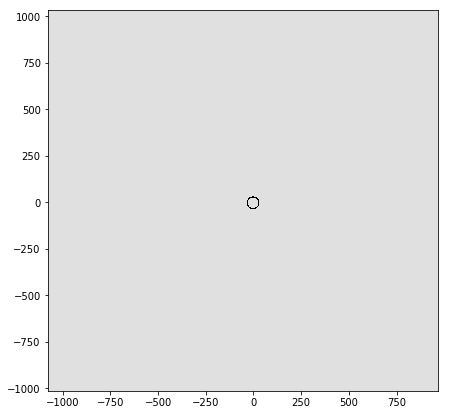

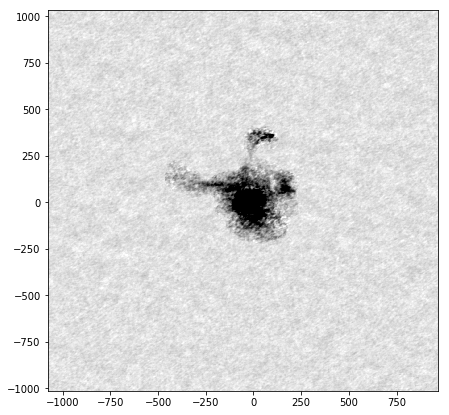

In [1]:
import numpy as np
#import pyfits as fits
import math
from astropy import wcs
from astropy.io import fits
from astropy.io import ascii
from scipy.interpolate import griddata
from scipy import stats
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as ticker
from astropy.table import Table, Column

%matplotlib inline

# %&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&
# CGS PHYSICAL CONSTANTS
# %&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&

c = 2.99792458e10       # speed of light CGS
h = 6.6260755e-27       # Planck's constant CGS
g = 6.67259e-8          # Grav const CGS
kb = 1.380658e-16       # Boltzmann's const CGS
a = 7.56591e-15         # Radiation constant CGS
sb = 5.67051e-5         # sigma (stefan-boltzmann const) CGS
qe =  4.803206e-10      # Charge of electron CGS
ev =  1.60217733e-12    # Electron volt CGS
na =  6.0221367e23      # Avagadro's Number
me =  9.1093897e-28     # electron mass CGS
mp =  1.6726231e-24     # proton mass CGS
mn = 1.674929e-24       # neutron mass CGS
mh = 1.673534e-24       # hydrogen mass CGS
amu =  1.6605402e-24    # atomic mass unit CGS
pi = 3.14159
# %&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&
# ASTRONOMICAL CONSTANTS
# %&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&

# GENERAL
au = 1.496e13           # astronomical unit CGS
pc = 3.0857e18          # parsec CGS
yr = 3.155815e7         # sidereal year CGS
ms = 1.98900e+33        # solar mass CGS
rs = 6.9599e10          # sun's radius CGS
ls = 3.839e33           # sun's luminosity CGS
mm = 7.35000e+25        # moon mass CGS
mer = 5.97400e+27       # earth mass CGS
rer = 6.378e8           # earth's radius CGS
medd = 3.60271e+34      # Eddington mass CGS

# RADIO SPECIFIC
jy = 1.e-23                  # Jansky CGS
restfreq_hi = 1420405751.786 # 21cm transition (Hz)
restfreq_co = 115271201800.  # CO J=1-0 (Hz)
cm2perkkms_hi = 1.823e18     # HI column per intensity (thin)

pa=(90.0-29.5)*3.14159/180.0
#pa=(45.0)*3.14159/180.0
inc=45.0*3.14159/180.0

pa = 0.
inc= 0.

# FUNCTION
def icrs_hr(icrs):
    tmp0 = float(icrs[0])
    tmp01 = tmp0
    if tmp01 < 0:
        tmp0 = abs(tmp0)
    tmp1 = abs(float(icrs[1])/60.)
    tmp2 = abs(float(icrs[2])/3600.)
    icrs = tmp0 + tmp1 + tmp2
    if tmp01 < 0:
        icrs = icrs * -1.
    return icrs

# must be run on deprojected data
# kinematic center, based off of C17O
imagename='L1448IRS3B_C17O_image_taper1500k.deproj_total.image.integrated.fits'
_end_='C17O_image_taper1500k_total.circ.deproj.subclump'
rms=4.34E-4
hdu = fits.open(imagename)
image = np.transpose(np.copy(hdu[0].data))
image=np.copy(hdu[0].data)

# PUT IN DEGREES or ICRS
ra_orig='03 25 36.297'
dec_orig='30 45 14.502'
while True:
    try:
        ra_fin = float(ra_orig)
        dec_fin = float(dec_orig)
    except ValueError:
        try:
            ra_fin = ra_orig.split(':')
            dec_fin = dec_orig.split(':')
            if len(ra_fin) == 1:
                ra_fin =  ra_orig.split(' ')            
            if len(dec_fin) == 1:
                dec_fin =  dec_orig.split(' ')
            if ((len(dec_fin) == 3) and (len(ra_fin) == 3)):
                ra_fin=icrs_hr(ra_fin)*15.
                dec_fin=icrs_hr(dec_fin)
                break
            else:
                continue
        except ValueError:
            input('Error: Press [RET] to continue.')
            continue
        continue
if (type(ra_fin) is float) and (type(dec_fin) is float):
    ra=ra_fin
    dec=dec_fin

header= hdu[0].header
w = wcs.WCS(hdu[0].header)
    #w.wcs.print_contents()
    #pixcrd = numpy.array([[0, 0], [24, 38], [45, 98]], numpy.float_)
    #print(pixcrd
    #pixcrd=np.array([[1000,1000],[1000,1000]])
    #world = w.wcs_pix2world(pixcrd, 0)
    #print(world)
pixscaledeg=header['CDELT2']
pixscale=header['CDELT2']*3600
bmaj=header['BMAJ']
bmin=header['BMIN']
npix=header['NAXIS1']
freq=header['CRVAL3']
omega=(pi*bmaj*bmin)*(pi/180.0)**2
beamarea=(omega)/(4.0*math.log(2.0))
pixelarea=(pixscaledeg*pi/180.0)**2
print('Frequency', freq)
print('Beam area', beamarea)
print('Pixel area', pixelarea)
jybm2jy=1.0/beamarea*pixelarea
pixelsperbeam=beamarea/pixelarea

print('bmaj {}'.format(bmaj))
print('bmin {}'.format(bmin))

print('Pixels per beam area', pixelsperbeam)
print('Jy per Beam to Jy per pixel',jybm2jy)
image=image[::-1][::-1][:][:]*jybm2jy
print(ra,dec)

avgbeam=(bmaj+bmin)/2.0*3600.0
print('Average Beam: ', avgbeam,avgbeam/pixscale)
aperturebase=avgbeam/pixscale/2.0

print('beamarea=',beamarea)
print('omega=',omega)
print('pixelarea=',pixelarea)
print('pixelsperbeam=',pixelsperbeam)
print('pixscale=',pixscale)
print('pixscaledeg=',pixscaledeg)


world=np.array([[ra,dec,0,0]  ])
pix=w.wcs_world2pix(world, 0)
print(pix)
xcen=pix[0][0]
ycen=pix[0][1]
apertures=np.arange(1.0,40.0, dtype=np.float)*aperturebase # edit this to increase mask size
print('Apertures: [',','.join(map(str,apertures)),']')
print(type(apertures))
#xgrid_off=np.arange(npix,dtype=np.float)-npix/2.0
#xgrid_off=np.arange(npix,dtype=np.float)-1016
#ygrid_off=np.arange(npix,dtype=np.float)-npix/2.0

xgrid_off=np.arange(npix,dtype=np.float)-xcen
ygrid_off=np.arange(npix,dtype=np.float)-ycen

ygrid_proj=ygrid_off #/np.cos(inc)
#print(ygrid_proj

xgrid,ygrid=np.meshgrid(xgrid_off,ygrid_proj)

r = np.sqrt(xgrid**2 + (ygrid)**2)
mask1 = r < apertures[5]
mask2 = r > apertures[4] 
mask=mask1*mask2
fig=plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
plt.pcolormesh(xgrid_off[:],ygrid_proj[:],mask[:,:], cmap='gray_r', vmin=-0.014, vmax=0.1)
fig=plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
plt.pcolormesh(xgrid_off[:],ygrid_off[:],image[0,0,:,:]/jybm2jy, cmap='gray_r', vmin=-0.0014, vmax=0.01)

0.0
[False False False ..., False False False]
(1, 1, 2048, 2048)
(2048, 2048)
(2048, 2048)


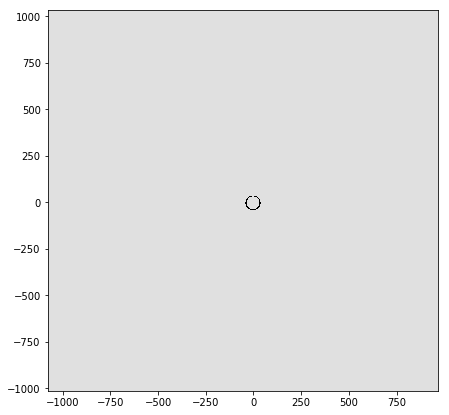

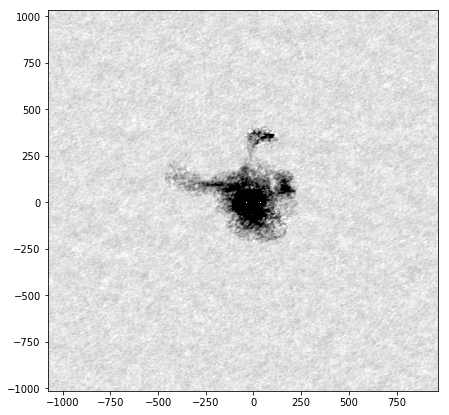

In [2]:

print(pa)

xgrid_rot= (xgrid * np.cos(pa) - ygrid * np.sin(pa)) # disk major axis
ygrid_rot= (xgrid * np.sin(pa) + ygrid * np.cos(pa)) # disk minor axis

#print(xgrid_rot.shape
#print(ygrid_rot.shape
#print(xgrid_rot[1000:1050,1000:1050]
#print(ygrid_rot[1000:1050,1000:1050]


r = np.sqrt(xgrid_rot**2 + (ygrid_rot/np.cos(inc))**2)
mask1 = r > apertures[5]
mask2 = r < apertures[6]
mask=mask1*mask2
fig=plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
plt.pcolormesh(xgrid_off[:],ygrid_off[:],mask[:,:], cmap='gray_r', vmin=-0.014, vmax=0.1)

mask1 = r > apertures[5]
mask2 = r < apertures[6]
mask=mask1*mask2
print(mask[1024][:])
fig=plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

print(image.shape)
print(mask.shape)
maskedimage=np.ma.MaskedArray(image[0,0,:,:], mask=mask)
print(maskedimage.shape)
plt.pcolormesh(xgrid_off[:],ygrid_off[:],maskedimage[:,:]/jybm2jy, cmap='gray_r', vmin=-0.0014, vmax=0.01)

#ymin=int(round(ycen-apertures)+1)
#ymax=int(round(ycen+apertures)+1)
#xmin=int(round(xcen-apertures)+1)
#xmax=int(round(xcen+apertures)+1)
#print(xmin,xmax,ymin,ymax


5.62649816275 0.0665479749441 0.000315041622553 0.0665479749441 0.000315041622553 100
11.2529963255 0.182744309306 0.00094512486766 0.182744309306 0.00094512486766 300
16.8794944882 0.268597632647 0.00156890728032 0.268597632647 0.00156890728032 498
22.505992651 0.32581743598 0.00218953927675 0.32581743598 0.00218953927675 695
28.1324908137 0.350822031498 0.00281017127318 0.350822031498 0.00281017127318 892
33.7589889765 0.363570481539 0.00345915701564 0.363570481539 0.00345915701564 1098
39.3854871392 0.363026022911 0.00405458568226 0.363026022911 0.00405458568226 1287
45.011985302 0.362316161394 0.00471932350585 0.362316161394 0.00471932350585 1498
50.6384834647 0.351147294044 0.00532420342115 0.351147294044 0.00532420342115 1690
56.2649816275 0.326350212097 0.00593538416891 0.326350212097 0.00593538416891 1884
61.8914797902 0.316786706448 0.0066001219925 0.316786706448 0.0066001219925 2095
67.517977953 0.320532143116 0.00718924982667 0.320532143116 0.00718924982667 2282
73.144476115

/home/reynolds/ryle/programs/Python-3.6.1/bin/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


118.156461418 0.206298917532 0.0128726006975 0.206298917532 0.0128726006975 4086
123.78295958 0.204427972436 0.0134774806128 0.204427972436 0.0134774806128 4278
129.409457743 0.189811587334 0.0140886613606 0.189811587334 0.0140886613606 4472
135.035955906 0.187033236027 0.0147250454382 0.187033236027 0.0147250454382 4674
140.662454069 0.184214502573 0.0153803320131 0.184214502573 0.0153803320131 4882
146.288952231 0.182613953948 0.015966309431 0.182613953948 0.015966309431 5068
151.915450394 0.170037716627 0.016637348087 0.170037716627 0.016637348087 5281
157.541948557 0.154941812158 0.017223325505 0.154941812158 0.017223325505 5467
163.16844672 0.150285169482 0.0178061525067 0.150285169482 0.0178061525067 5652
168.794944882 0.154580965638 0.0185149961575 0.154580965638 0.0185149961575 5877
174.421443045 0.148019239306 0.0191041239916 0.148019239306 0.0191041239916 6064
180.047941208 0.144244924188 0.0197468089017 0.144244924188 0.0197468089017 6268
185.674439371 0.143216907978 0.02038

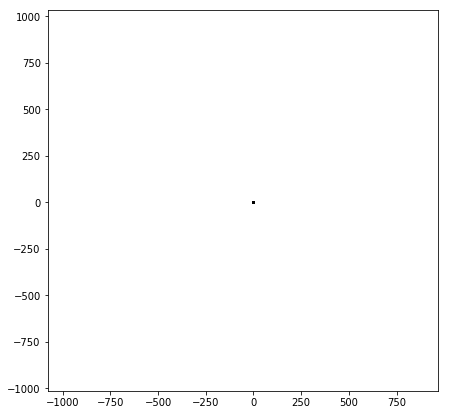

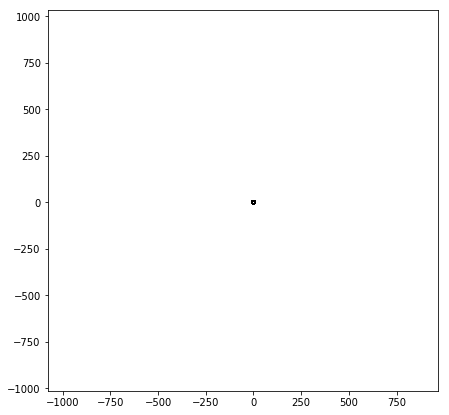

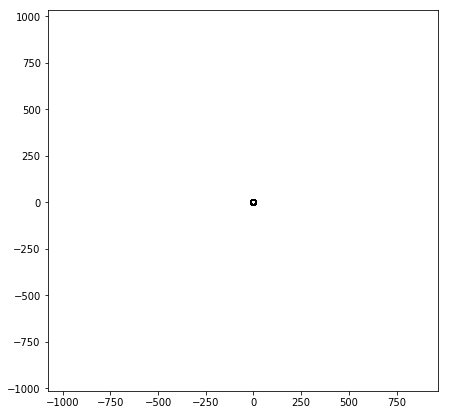

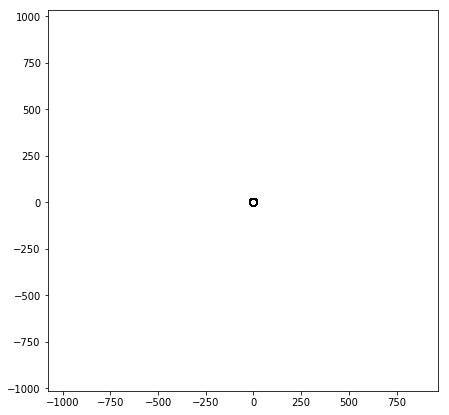

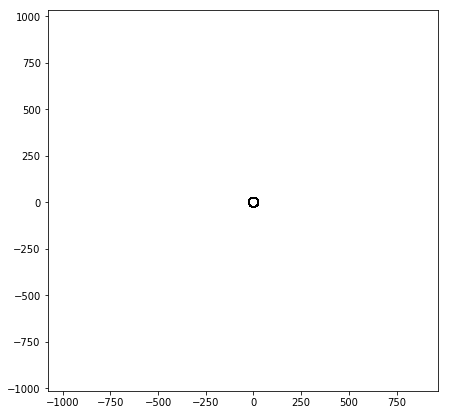

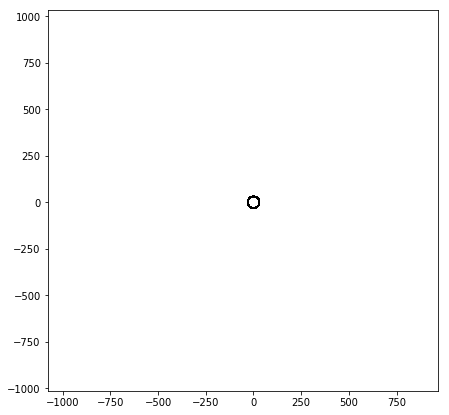

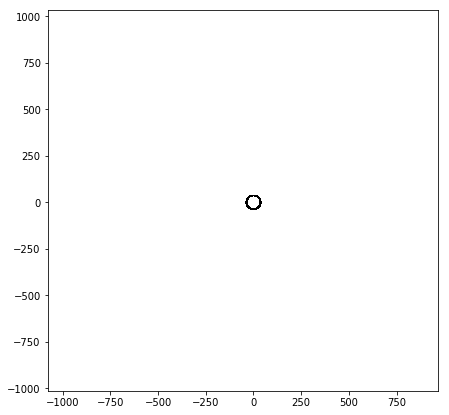

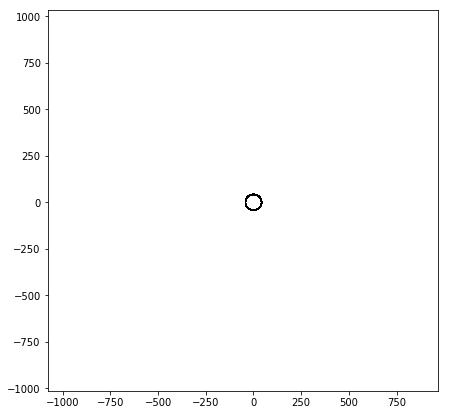

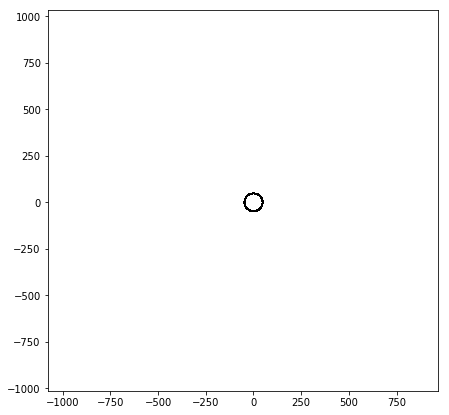

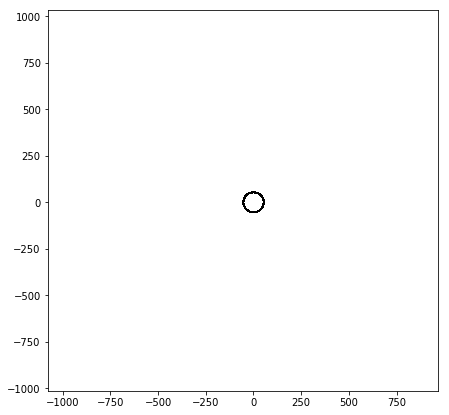

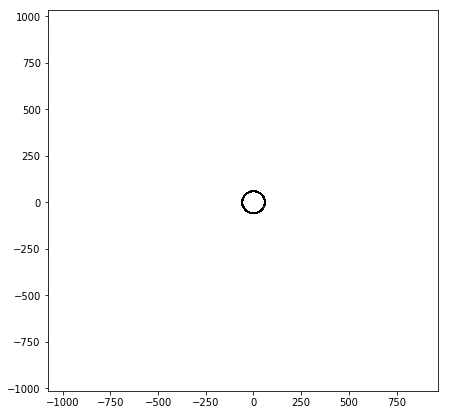

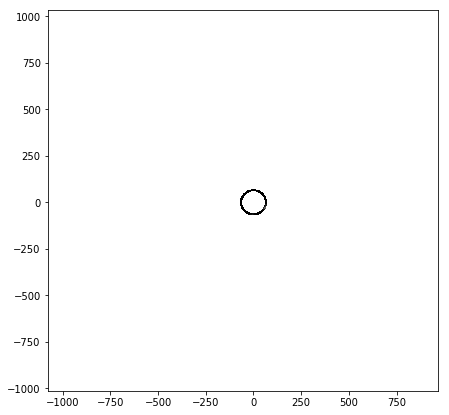

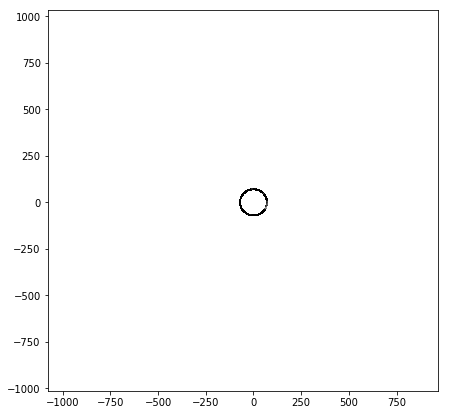

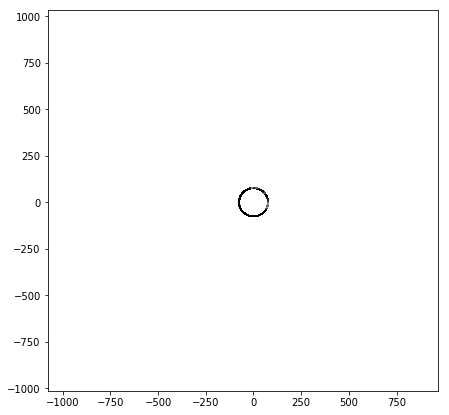

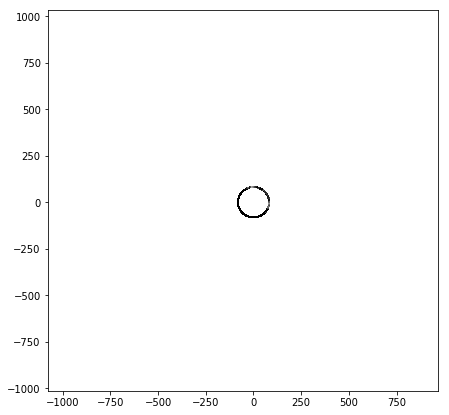

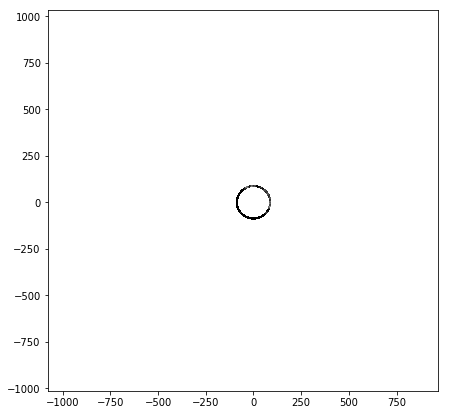

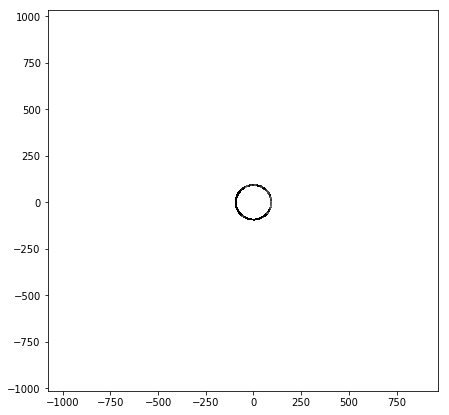

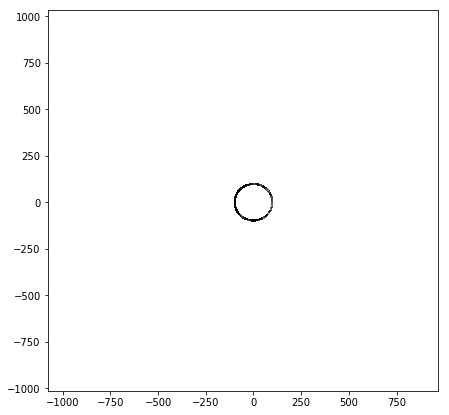

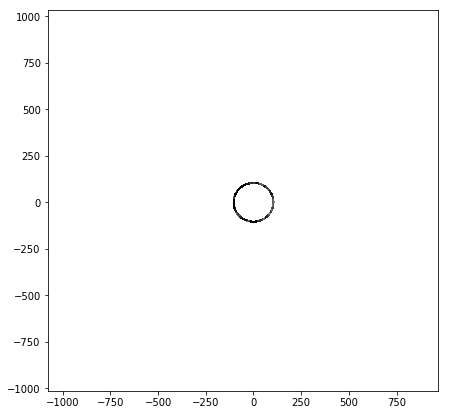

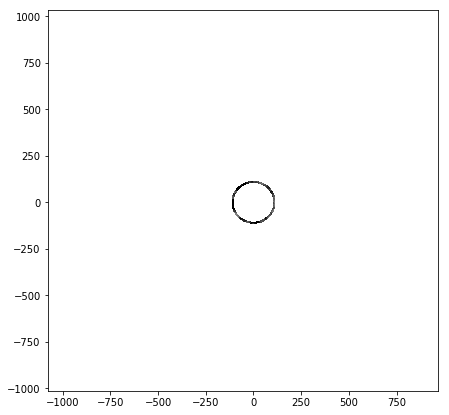

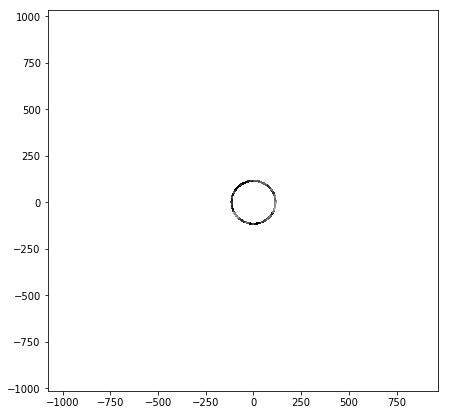

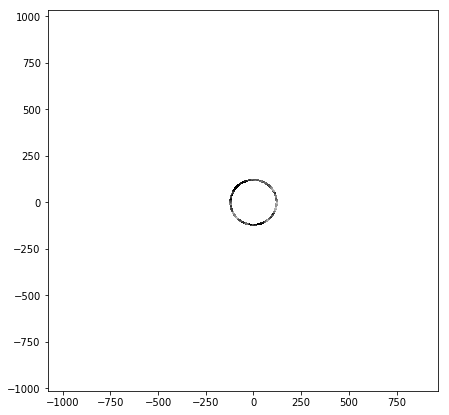

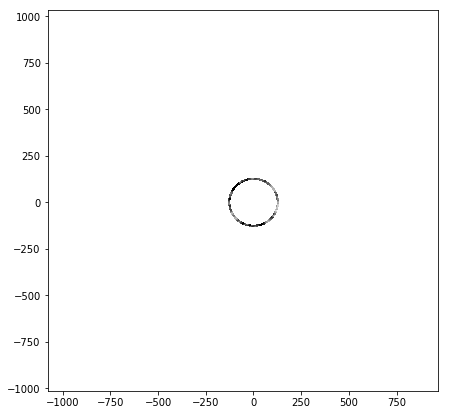

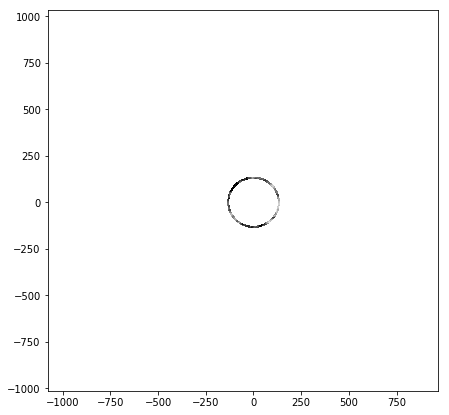

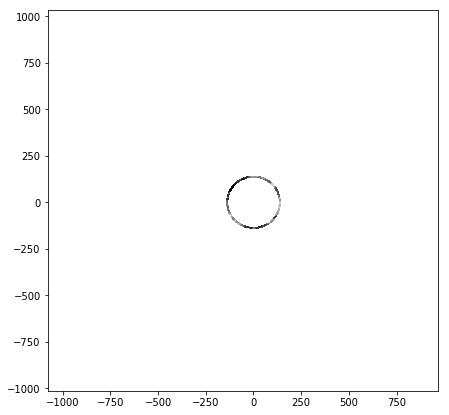

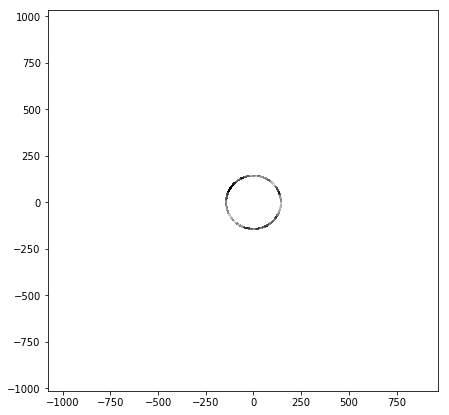

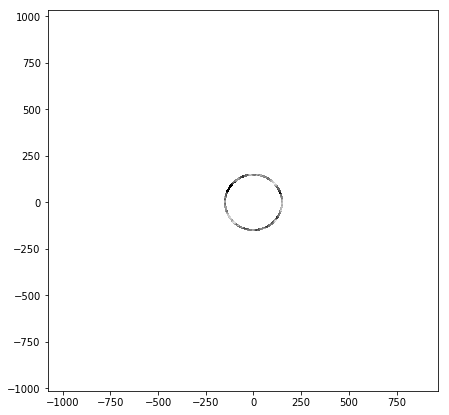

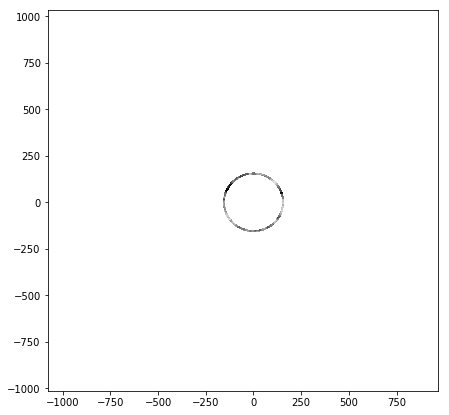

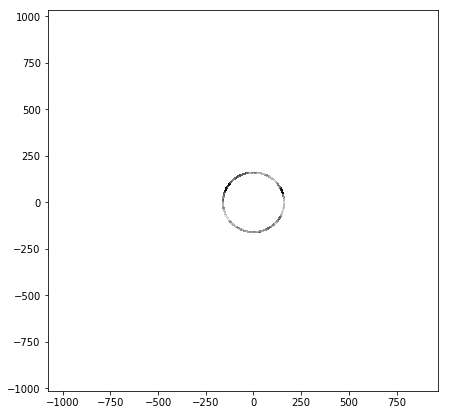

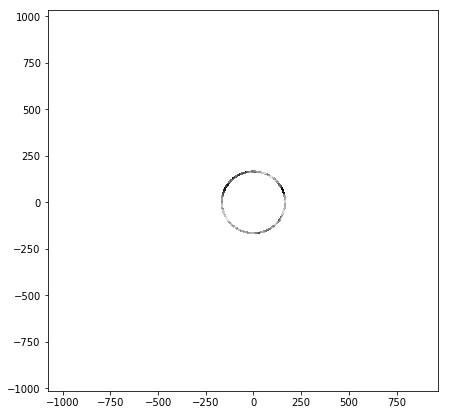

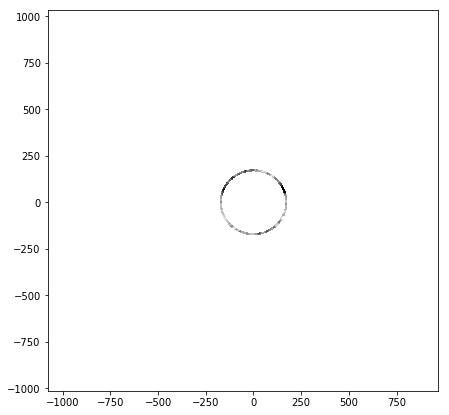

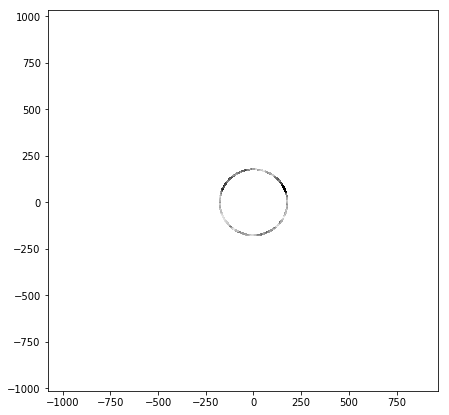

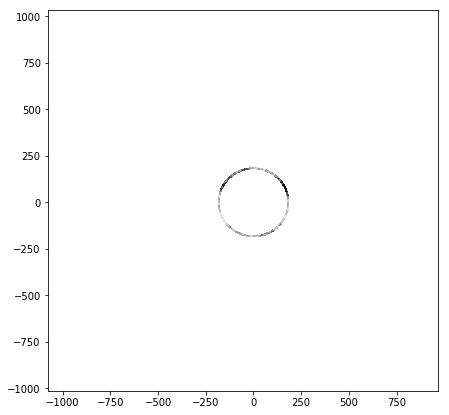

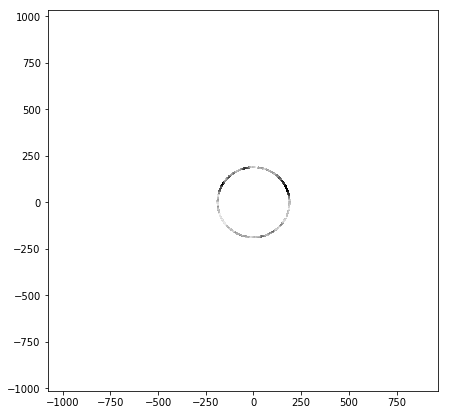

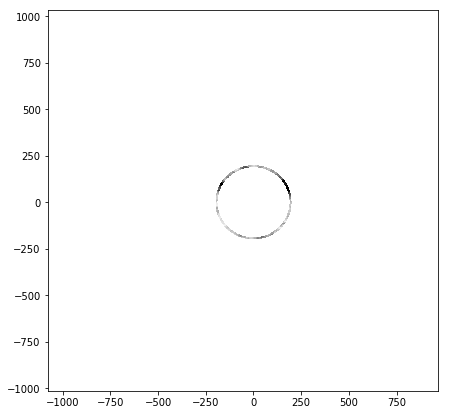

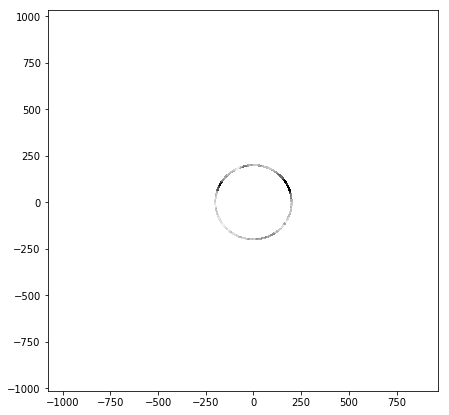

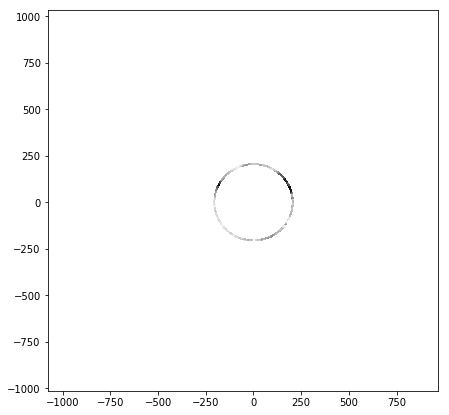

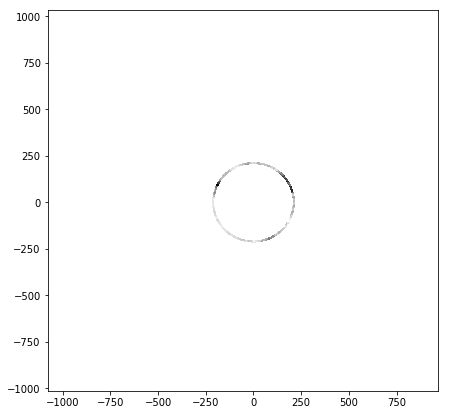

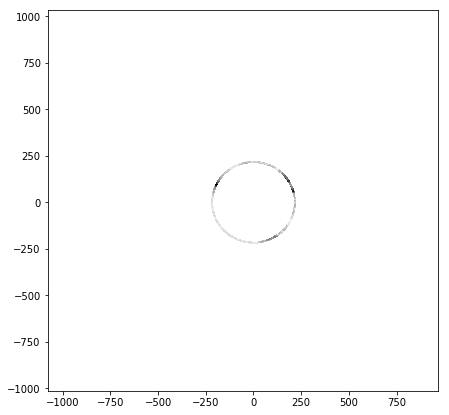

In [3]:
aper_fluxes=np.zeros(len(apertures))
error_aper_fluxes=np.zeros(len(apertures))
diff_aper_fluxes=np.zeros(len(apertures))
error_diff_aper_fluxes=np.zeros(len(apertures))
diff_area=np.zeros(len(apertures))

for i in range(len(apertures)):
    if i == 0:
        mask = r > apertures[0]
        maskinverse=r < apertures[0]
        maskinverse=~mask
        maskedimage=np.ma.MaskedArray(image[0,0,:,:], mask=mask)
        npixels=np.sum(~mask)
    elif i > 0:  
        mask1 = r > apertures[i-1]
        mask2 = r <= apertures[i]
        mask = mask1*mask2
        maskinverse=~mask
        maskedimage=np.ma.MaskedArray(image[0,0,:,:], mask=~mask)
        npixels=np.sum(mask)
    fig=plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111)
    plt.pcolormesh(xgrid_off[:],ygrid_off[:],maskedimage[:,:]/jybm2jy, cmap='gray_r', vmin=-0.0014, vmax=0.01)
    aper_fluxes[i]=np.sum(maskedimage)

    error_aper_fluxes[i]=npixels/pixelsperbeam*rms
    if i == 0:
        diff_aper_fluxes[i]=aper_fluxes[i].copy()
        error_diff_aper_fluxes[i]=error_aper_fluxes[i].copy()
        diff_area[i]=(apertures[i]*pixscale*230.0)**2*3.14159
    elif i > 0:
        diff_aper_fluxes[i]=aper_fluxes[i].copy()
        error_diff_aper_fluxes[i]=error_aper_fluxes[i].copy()
        diff_area[i]=(apertures[i]*pixscale*230.0)**2*3.14159 -(apertures[i-1]*pixscale*230.0)**2*3.14159

    print(apertures[i], aper_fluxes[i],error_aper_fluxes[i], diff_aper_fluxes[i],error_diff_aper_fluxes[i],npixels)

    

[   25.88189155    51.7637831     77.64567465   103.52756619   129.40945774
   155.29134929   181.17324084   207.05513239   232.93702394   258.81891549
   284.70080703   310.58269858   336.46459013   362.34648168   388.22837323
   414.11026478   439.99215633   465.87404788   491.75593942   517.63783097
   543.51972252   569.40161407   595.28350562   621.16539717   647.04728872
   672.92918026   698.81107181   724.69296336   750.57485491   776.45674646
   802.33863801   828.22052956   854.1024211    879.98431265   905.8662042
   931.74809575   957.6299873    983.51187885  1009.3937704 ]


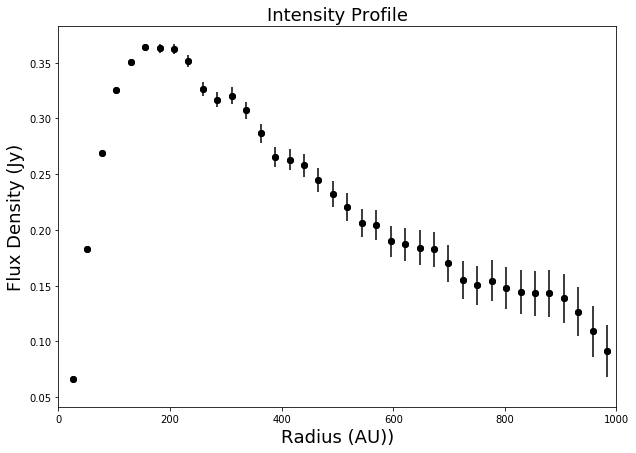

In [4]:
fig=plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.set_xlim(0,1000.0)
#ax.set_ylim(-0.001,0.01)

radii=apertures*pixscale*230.0
print(radii)
lin1=ax.plot(radii,diff_aper_fluxes,marker='o',color='black',linestyle='none')
lin1err=ax.errorbar(radii,diff_aper_fluxes, yerr=error_diff_aper_fluxes, fmt='o',color='black')

ax.set_title('Intensity Profile', fontsize=18)
ax.set_ylabel('Flux Density (Jy)', fontsize=18)
ax.set_xlabel('Radius (AU))', fontsize=18)
plt.savefig('L1448N-intensity-rad-xsec-' + _end_ + '.pdf')

472.7541523329254
      R      
-------------
75.4760209606
76.3951991317
77.3255714345
78.2672741959
79.2204454017
80.1852247213
81.1617535214
 82.150174893
83.1506336684
84.1632764445
          ...
265.793505317
269.030448455
272.306812423
275.623077306
278.979729033
282.377259452
  285.8161664
289.296953778
292.820131623
296.386216183
299.995729995
Length = 115 rows
-0.418746248482 2.31465548932 -0.999946625036 2.99624228455e-226 0.000407017319387
[ 55.42580495  39.97224163  33.45885489  29.5670678   26.89266798
  24.90585981  23.35446598  22.10014262  21.05941029  20.17895325
  19.42216268 -99.         -99.         -99.         -99.         -99.         -99.
 -99.         -99.         -99.         -99.         -99.         -99.         -99.
 -99.         -99.         -99.         -99.         -99.         -99.         -99.
 -99.         -99.         -99.         -99.         -99.         -99.         -99.
 -99.        ]
(array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24

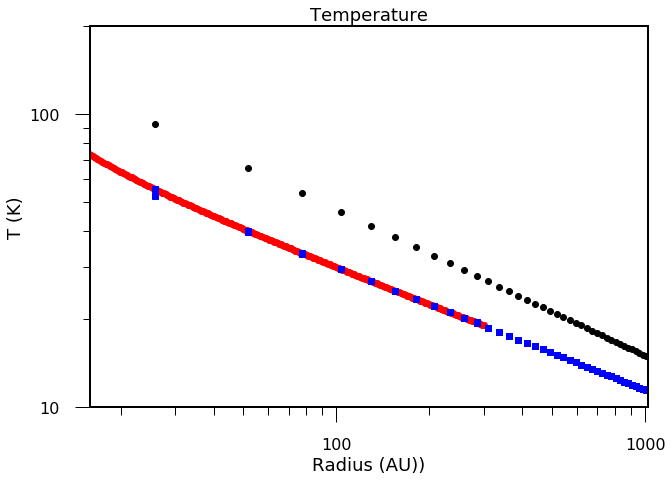

In [5]:
L_system=8.3
teq_at_1AU=(L_system*ls/(16.0*sb*pi*(au)**2))**0.25
print(teq_at_1AU)
temp=(radii/1.0)**(-0.5)*teq_at_1AU
#print(radii,temp

modeltemp=ascii.read('TvsR.dat',names=['R', 'T'])

modeltemp['R']=modeltemp['R']/1.496e13
#print(modeltemp
newtemp=griddata(modeltemp['R'],modeltemp['T'],radii,method='linear',fill_value=-99.0)
ind = (modeltemp['R'] > 75.0).nonzero()

print(modeltemp['R'][ind])


slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(modeltemp['R'][ind]),np.log10(modeltemp['T'][ind]))
print(slope, intercept, r_value, p_value, std_err)
newtempextrap=(radii/radii[6])**(slope)*newtemp[6]
print(newtemp)

ind = (newtemp == -99.0).nonzero()
print(ind)
newtemp[ind]=newtempextrap[ind]

print(newtemp)

print(diff_area)

fig=plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)

radii=apertures*pixscale*230.0
ax.set_xlim(min(radii)-10,max(radii)+10)
ax.set_ylim(10,200.0)

lin1=ax.loglog(radii,temp,marker='o',color='black',linestyle='none')
lin1=ax.loglog(modeltemp['R'],modeltemp['T'],marker='o',color='red',linestyle='none')
lin1=ax.loglog(radii,newtemp,marker='s',color='blue',linestyle='none')
lin1=ax.loglog(radii,newtempextrap,marker='s',color='blue',linestyle='none')

ax.tick_params('both', which='major', length=15, width=1, pad=15)
ax.tick_params('both', which='minor', length=7.5, width=1, pad=15)
ticks_font = mpl.font_manager.FontProperties(size=16, weight='normal', stretch='normal')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontproperties(ticks_font)

for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
for axis in ['top','bottom','left','right']:
   ax.spines[axis].set_linewidth(2)

ax.set_title('Temperature', fontsize=18)
ax.set_ylabel('T (K)', fontsize=18)
ax.set_xlabel('Radius (AU))', fontsize=18)
plt.savefig('L1448N-Temp-rad-xsec-' + _end_ + '.pdf')

def emissive_mass(flux=None,lam=None,lam0=None,beta=None,kappa0=None,distance=None,temp=None):
    jy = 1.e-23                  # Jansky CGS
    k = 1.38064852E-16    #(cm^2)*g/(s^2)*K
    kb=k
    h = 6.626176E-27      #erg secs
    c = 2.998E10           #cm/sec 
    theta = 0.27*0.19     # arcsec^2
    theta = theta*np.pi * (1./(60.*60.))**2 * (np.pi/180.)**2
    nu = 337061.104*10**6  # Hz

    ######################
    w=flux #  Jy*km/s
    temp=temp
    w = w * 1.0e5 # to Jy*cm/s
    # finding temperature
    t = (2.*np.log(2.)*c**2)/(k * nu**2)*jy
    print('nu: ' + str(nu))
    print('HPBW**2: ' + str(theta))
    print('Jy to K: ' + str(t/theta))
    
    w=w*t/theta
    
    Tex=temp   # Excitation temperature of CO  in K
    # finding column density
    a = 2.32E-6     # s^-1
    B = 56179.99E6  # Hz
    z = k*Tex / (h * B)
    print('Partition: ' + str(z))
    j=3
    g = 2*j + 1
    mu = 0.11034
    E = h*B*(j*(j+1))
   # print(E/k)
    den=w

    n = (8. * np.pi * k * nu**2 * den )/(h * c**3 * a)

    print('N(thin): ' + str(n))

    lnN_tot = np.log(n/g) + np.log(z) + (E / (k * Tex))
    N_tot=np.exp(lnN_tot)
    print('log N(total): ' + str(lnN_tot))
    print('N(total) (cm^-2): ' + str(N_tot))

    N_tot_c17o = N_tot

    #surface area of region (used 1.0" for fiducial radius, replace with exact area
    #find N(CO)/N(H2) and N(C17O)/N(CO)

    cell=0.02 # arcsec
    area = 26856. * (cell**2)

    A= area *(230.0*1.496e13)**2
    #A=0.27*0.19*(distance*1.496e13)**2
    N_mol=N_tot#*A
    print('Area (cm^2): ' + str(A))
    print('N(total) (molecules C17O): ' + str(N_mol))


    abun_ratio_c17o_co = float(1./2000.)
    abun_ratio_co_h2 = float(10**-4)

    N_mol_h2 = N_mol/(abun_ratio_c17o_co * abun_ratio_co_h2)

    print('N(total) (molecules H2): ' + str(N_mol_h2))

    #h2_mass = 0.00201588 # kg/mole
    #mol = 6.022E23         # mol
    #Mass_h2 = h2_mass * (N_mol_h2/mol)
    solmass = 1.988435E33   # grams per sol mass

    mol_mass = 3.34E-24  # grams per H2

    Mass_h2 = N_mol_h2 * mol_mass    
    mass = Mass_h2
    return mass

nu=337.06121E9 # Hz
nc=2.99792458e8 # m/s
wavelen=nc/nu*1000
print(wavelen)
diff_percent_errors=error_diff_aper_fluxes/diff_aper_fluxes
percent_errors=error_aper_fluxes/aper_fluxes
mass_vs_r=emissive_mass(diff_aper_fluxes,wavelen,1.3,1.0,0.899,230.0,newtemp)
total_mass_vs_r=emissive_mass(aper_fluxes,wavelen,1.3,1.0,0.899,230.0,newtemp)

print('Total gas mass:',sum(total_mass_vs_r))



sigma=mass_vs_r#/(diff_area*1.496e13**2)
#sigma=mass_vs_r/(((apertures*pixscale*230.0*1.496e13)**2)*3.14159)
sigma2=total_mass_vs_r#/(((apertures*pixscale*230.0*1.496e13)**2)*3.14159)
print(sigma,'In g/cm^2')
print('Average Temp (K): ', sum(newtemp)/len(newtemp))
#,sigma2

data = Table([radii, sigma, newtemp], names=['R(AU)', 'sigma(g/cm-2)', 'T(K)'])
ascii.write(data, 'sigmavsR-concat'+_end_+'.dat',overwrite=True)


[  25.88189155   51.7637831    77.64567465  103.52756619  129.40945774
  155.29134929  181.17324084  207.05513239  232.93702394  258.81891549
  284.70080703  310.58269858  336.46459013  362.34648168  388.22837323
  414.11026478  439.99215633  465.87404788  491.75593942]
[ 0.81720208 -1.55252725] [ 0.05195993  0.06024699]


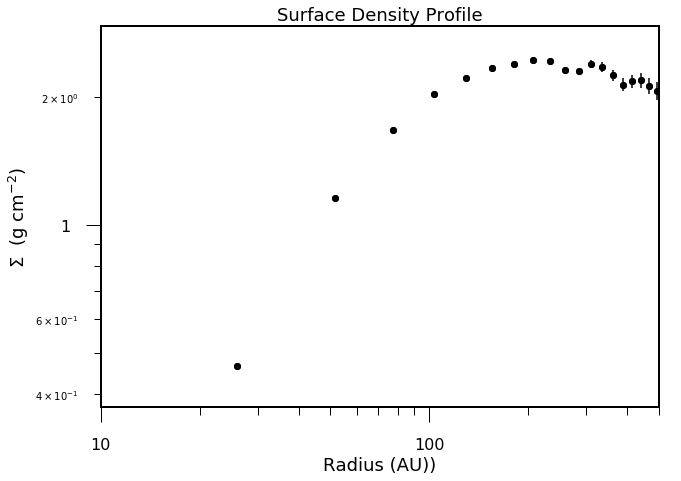

In [6]:
fig=plt.figure(figsize=(10,7))
#fig, ax1 = plt.subplots()
ax = fig.add_subplot(111)

ind = (radii < 500.0).nonzero()
ax.set_xlim(10,500.0)
ax.set_ylim(min(sigma[ind])*.8,max(sigma[ind])*1.2)

radii=apertures*pixscale*230.0
lin1=ax.loglog(radii[ind],sigma[ind],marker='o',color='black',linestyle='none')
lin1err=ax.errorbar(radii[ind],sigma[ind], yerr=sigma[ind]*diff_percent_errors[ind], fmt='o',color='black')
#lin2=ax.errorbar(radii[ind],diff_aper_fluxes[ind], yerr=error_diff_aper_fluxes[ind], fmt='o',color='black')
#lin1=ax.plot(radii,sigma2,marker='o',color='black',linestyle='none')
#lin1err=ax.errorbar(radii,sigma2, yerr=sigma2*percent_errors, fmt='o',color='black')
ax.tick_params('both', which='major', length=15, width=1, pad=15)
ax.tick_params('both', which='minor', length=7.5, width=1, pad=15)

ticks_font = mpl.font_manager.FontProperties(size=16, weight='normal', stretch='normal')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontproperties(ticks_font)

for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
for axis in ['top','bottom','left','right']:
   ax.spines[axis].set_linewidth(2)

ax.set_title('Surface Density Profile', fontsize=18)
ax.set_ylabel('$\Sigma$  (g cm$^{-2}$)', fontsize=18)
ax.set_xlabel('Radius (AU))', fontsize=18)


plt.savefig('L1448N-surface-density-lograd-xsec-' + _end_ + '.pdf')

from scipy import optimize

def func(x, a, b):
    return x**a +b

ind = (radii < 500.0).nonzero()
#print ind
print(radii[ind])
logerrors=0.434*diff_percent_errors
popt,pcov = optimize.curve_fit(func, np.log10(radii[ind]),np.log10(sigma[ind]),sigma=logerrors[ind])

perr = np.sqrt(np.diag(pcov))
print(popt,perr)

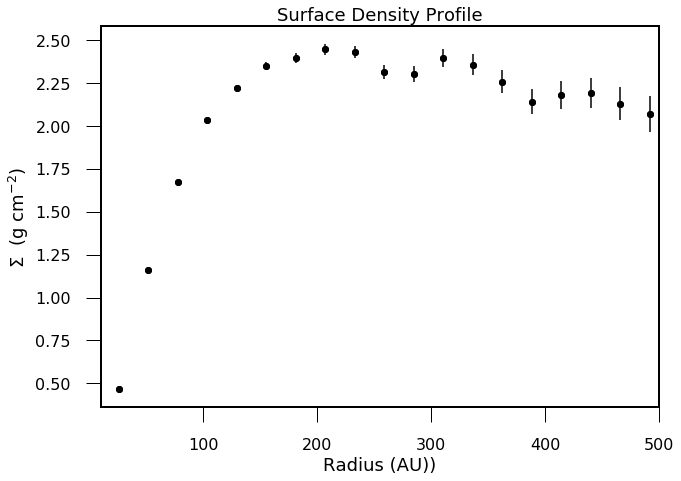

In [7]:
fig=plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.set_xlim(10,500.0)
#ax.set_ylim(-0.001,0.01)
ind = (radii < 500.0).nonzero()

#radii=apertures*pixscale*230.0
lin1=ax.plot(radii[ind],sigma[ind],marker='o',color='black',linestyle='none')
lin1err=ax.errorbar(radii[ind],sigma[ind], yerr=sigma[ind]*diff_percent_errors[ind], fmt='o',color='black')
#lin1=ax.plot(radii,sigma2,marker='o',color='black',linestyle='none')
#lin1err=ax.errorbar(radii,sigma2, yerr=sigma2*percent_errors, fmt='o',color='black')
ax.tick_params('both', which='major', length=15, width=1, pad=15)
ax.tick_params('both', which='minor', length=7.5, width=1, pad=15)

ticks_font = mpl.font_manager.FontProperties(size=16, weight='normal', stretch='normal')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontproperties(ticks_font)

#for axis in [ax.xaxis, ax.yaxis]:
#    axis.set_major_formatter(ScalarFormatter())
#    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
for axis in ['top','bottom','left','right']:
   ax.spines[axis].set_linewidth(2)

ax.set_title('Surface Density Profile', fontsize=18)
ax.set_ylabel('$\Sigma$  (g cm$^{-2}$)', fontsize=18)
ax.set_xlabel('Radius (AU))', fontsize=18)
plt.savefig('L1448N-surface-density-linear-xsec-' + _end_ + '.pdf')


In [8]:
Omega=np.sqrt(g*1.06*1.99e33)/(2.0*pi*(radii*au)**1.5)
print(0.75/np.sin(45.0*pi/180.0), math.sin(35.0*pi/180.0))

cs=(1.5*kb*temp*2.0/(3.34e-24*2.36))**0.5
print('radii :',radii)
print('omega :', Omega,1.0/Omega/3.14e7)
print('sound speed:',cs/1.0e5)
Q_toomre= Omega*cs/(pi*g*sigma)
print('Toomre Q:',Q_toomre)

1.06066087542 0.573576013688344
radii : [   25.88189155    51.7637831     77.64567465   103.52756619   129.40945774
   155.29134929   181.17324084   207.05513239   232.93702394   258.81891549
   284.70080703   310.58269858   336.46459013   362.34648168   388.22837323
   414.11026478   439.99215633   465.87404788   491.75593942   517.63783097
   543.51972252   569.40161407   595.28350562   621.16539717   647.04728872
   672.92918026   698.81107181   724.69296336   750.57485491   776.45674646
   802.33863801   828.22052956   854.1024211    879.98431265   905.8662042
   931.74809575   957.6299873    983.51187885  1009.3937704 ]
omega : [  2.47831086e-10   8.76215207e-11   4.76951147e-11   3.09788857e-11
   2.21666862e-11   1.68627695e-11   1.33816208e-11   1.09526901e-11
   9.17892910e-12   7.83710706e-12   6.79308035e-12   5.96188934e-12
   5.28738277e-12   4.73111741e-12   4.26598075e-12   3.87236071e-12
   3.53575690e-12   3.24524151e-12   2.99243950e-12   2.77083577e-12
   2.57529413e

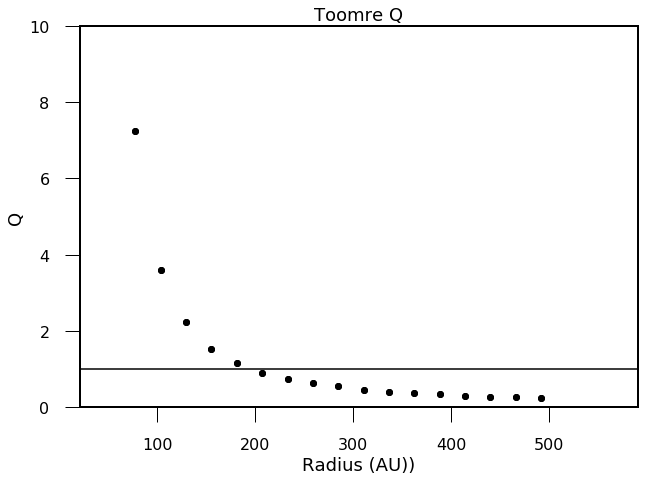

In [9]:
    fig=plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111)
    ind = (radii < 500.0).nonzero()
    
    ax.set_xlim(min(radii[ind])*.8,max(radii[ind])*1.2)
    ax.set_ylim(min(Q_toomre[ind])*.8,10)#max(Q_toomre[ind])*1.2)
    ax.set_ylim(0,10)
    #radii=apertures*pixscale*230.0
    lin1=ax.plot(radii[ind],Q_toomre[ind],marker='o',color='black',linestyle='none')
    lin1err=ax.errorbar(radii[ind],Q_toomre[ind], yerr=Q_toomre[ind]*diff_percent_errors[ind], fmt='o',color='black')
    #lin1=ax.plot(radii,sigma2,marker='o',color='black',linestyle='none')
    #lin1err=ax.errorbar(radii,sigma2, yerr=sigma2*percent_errors, fmt='o',color='black')
    ax.tick_params('both', which='major', length=15, width=1, pad=15)
    ax.tick_params('both', which='minor', length=7.5, width=1, pad=15)
    
    lin1=ax.plot([0,10000],[1,1],color='black')
    ticks_font = mpl.font_manager.FontProperties(size=16, weight='normal', stretch='normal')
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
                label.set_fontproperties(ticks_font)
    
    #for axis in [ax.xaxis, ax.yaxis]:
    #    axis.set_major_formatter(ScalarFormatter())
    #    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
    for axis in ['top','bottom','left','right']:
       ax.spines[axis].set_linewidth(2)
    
    ax.set_title('Toomre Q', fontsize=18)
    ax.set_ylabel('Q', fontsize=18)
    ax.set_xlabel('Radius (AU))', fontsize=18)
    plt.savefig('L1448N-toomre-Q-linear-xsec-' + _end_ + '.pdf')


[  25.88189155   51.7637831    77.64567465  103.52756619  129.40945774
  155.29134929  181.17324084  207.05513239  232.93702394  258.81891549
  284.70080703  310.58269858  336.46459013  362.34648168  388.22837323
  414.11026478  439.99215633  465.87404788  491.75593942]
[ 0.81720208 -1.55252725] [ 0.05195993  0.06024699]
[   25.88189155    51.7637831     77.64567465   103.52756619   129.40945774
   155.29134929   181.17324084   207.05513239   232.93702394   258.81891549
   284.70080703   310.58269858   336.46459013   362.34648168   388.22837323
   414.11026478   439.99215633   465.87404788   491.75593942   517.63783097
   543.51972252   569.40161407   595.28350562   621.16539717   647.04728872
   672.92918026   698.81107181   724.69296336   750.57485491   776.45674646
   802.33863801   828.22052956   854.1024211    879.98431265   905.8662042
   931.74809575   957.6299873    983.51187885  1009.3937704 ]


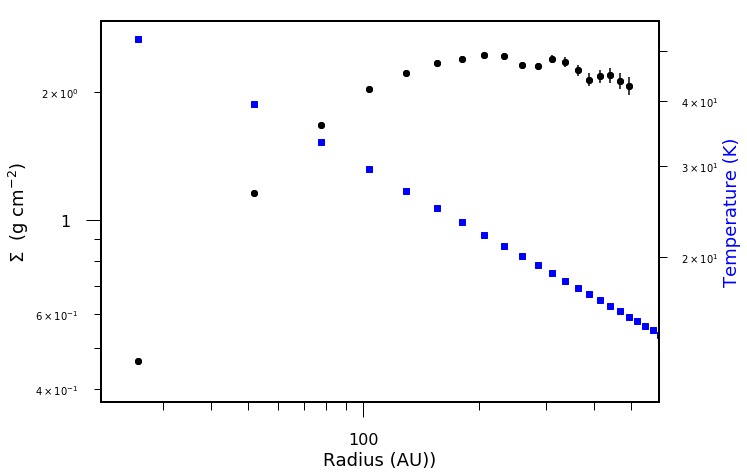

In [10]:
#fig=plt.figure(figsize=(10,7))
fig, ax1 = plt.subplots(figsize=(10,7))

ax2=ax1.twinx()

#ax = fig.add_subplot(111)


ind = (radii < 500.0).nonzero()
radii=apertures*pixscale*230.0

ax1.set_xlim(min(radii[ind])*.8,max(radii[ind])*1.2)
ax1.set_ylim(min(sigma[ind])*.8,max(sigma[ind])*1.2)

ax1.loglog(radii[ind],sigma[ind],marker='o',color='black',linestyle='none')
ax1.errorbar(radii[ind],sigma[ind], yerr=sigma[ind]*diff_percent_errors[ind], fmt='o',color='black')
ax1.errorbar(radii[ind],diff_aper_fluxes[ind], yerr=error_diff_aper_fluxes[ind], fmt='d',color='black')
#lin1=ax.plot(radii,sigma2,marker='o',color='black',linestyle='none')
#lin1err=ax.errorbar(radii,sigma2, yerr=sigma2*percent_errors, fmt='o',color='black')
ax1.tick_params('both', which='major', length=15, width=1, pad=15)
ax1.tick_params('both', which='minor', length=7.5, width=1, pad=15)

ticks_font = mpl.font_manager.FontProperties(size=16, weight='normal', stretch='normal')

for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
            label.set_fontproperties(ticks_font)

for axis in [ax1.xaxis, ax1.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
    ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
for axis in ['top','bottom','left','right']:
   ax1.spines[axis].set_linewidth(2)

ax1.set_title('', fontsize=18)
ax1.set_ylabel('$\Sigma$  (g cm$^{-2}$)', fontsize=18)
ax1.set_xlabel('Radius (AU))', fontsize=18)


ax2.loglog(radii,newtempextrap,marker='s',color='blue',linestyle='none')
ax2.tick_params('both', which='major', length=15, width=1, pad=15)
ax2.tick_params('both', which='minor', length=7.5, width=1, pad=15)

for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
            label.set_fontproperties(ticks_font)

for axis in [ax2.xaxis, ax2.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
    ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)

    ax2.set_ylabel('Temperature (K)', color='b', fontsize=18)
    
for tl in ax2.get_yticklabels():
    tl.set_color('b')
    
plt.savefig('L1448N-surface-dens-int-temp-lograd-xsec-' + _end_ + '.pdf')

from scipy import optimize

def func(x, a, b):
    return x**a +b

ind = (radii <500.0).nonzero()
#print ind
print(radii[ind])
logerrors=0.434*diff_percent_errors
popt,pcov = optimize.curve_fit(func, np.log10(radii[ind]),np.log10(sigma[ind]),sigma=logerrors[ind])

perr = np.sqrt(np.diag(pcov))
print(popt,perr)
print(radii)